## Grandma's bread shop

Try to clusterize the Grandma's bread shop customers by item and by date. Then try to explain how are the clusters (cluster EDA).

In [1]:
import pylab as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
# Run this code

import pandas as pd

df=pd.read_csv('data/breadbasket_dms.csv')

df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [3]:
df.Item.nunique()

95

In [4]:
df.Item.value_counts().nlargest(11)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64

In [5]:
top10= ['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Medialuna', 'Hot chocolate', 'Cookies', 'Brownie']

In [6]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

# Fechas

In [7]:
df['Datetime']=pd.to_datetime(df.Date+' '+df.Time,
                                      format='%Y-%m-%d %H:%M:%S')

In [8]:
df['day'] = df.Datetime.dt.day_name()
df['hour'] = df.Datetime.dt.hour
df['month'] = df.Datetime.dt.month

In [9]:
df = pd.get_dummies(df, columns = ['Item'] , drop_first=False)

In [10]:
new_columns = [k.replace('Item_','').replace('day_', '') for k in df.columns] 
df=df.rename(columns={k:v for k,v in zip(df.columns, new_columns)})

In [11]:
df_group = df.groupby(['Datetime', 'Transaction']).sum()
df_group.reset_index(level='Datetime', inplace=True)
df_group.head()

,Datetime,hour,month,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,9,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,20,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,30,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-10-30 10:08:41,10,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2016-10-30 10:13:03,30,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_group = df_group.drop('Datetime', axis=1)

# PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()

pca.fit(df_group)

print(df_group.shape)

pca.explained_variance_ratio_

(9531, 97)


array([7.57347644e-01, 2.38875375e-01, 8.80758290e-04, 4.81528245e-04,
       2.30860933e-04, 1.99386862e-04, 1.86580821e-04, 1.59697955e-04,
       1.46751446e-04, 1.26224801e-04, 1.17143942e-04, 1.05213804e-04,
       8.02806112e-05, 7.57460521e-05, 7.30919202e-05, 7.27940335e-05,
       6.98726429e-05, 6.49503444e-05, 6.23243131e-05, 5.63124795e-05,
       4.95520355e-05, 4.15982300e-05, 3.64742944e-05, 3.29717750e-05,
       3.20520292e-05, 3.03426602e-05, 2.86964997e-05, 2.79036358e-05,
       2.51356395e-05, 2.41664344e-05, 2.38532070e-05, 2.06494927e-05,
       1.73176279e-05, 1.51974874e-05, 1.37375445e-05, 1.24516687e-05,
       1.16483985e-05, 1.12604370e-05, 1.05234481e-05, 9.81881779e-06,
       9.46032293e-06, 8.04697861e-06, 7.32541025e-06, 6.52033886e-06,
       5.66704519e-06, 5.54997726e-06, 4.40156608e-06, 3.59942401e-06,
       3.34106630e-06, 3.14538995e-06, 2.78950414e-06, 2.60601745e-06,
       2.53668272e-06, 2.41492169e-06, 2.39043917e-06, 2.33948313e-06,
      

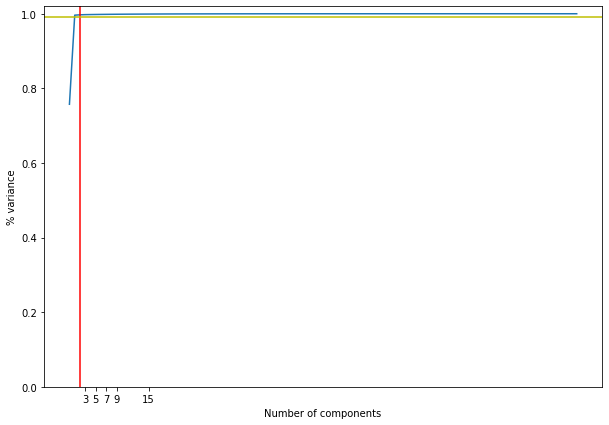

In [16]:
plt.figure(figsize=(10, 7))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of components')
plt.xticks([3, 5, 7, 9, 15])
plt.axvline(x=2, color = 'r')
plt.axhline(y=0.99, color = 'y')
plt.ylabel('% variance')
plt.ylim([0, 1.02]);

In [17]:
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.9962230183084086

In [18]:
pca = PCA(n_components=2).fit_transform(df_group)

pca_df = pd.DataFrame(pca, columns=[f'pc_{i+1}' for i in range(2)])

pca_df.head()

,pc_1,pc_2
0,-17.717219,-5.856571
1,-3.305131,-9.487240
2,10.233380,-13.585845
3,-16.836425,-5.385123
4,10.244527,-13.585366


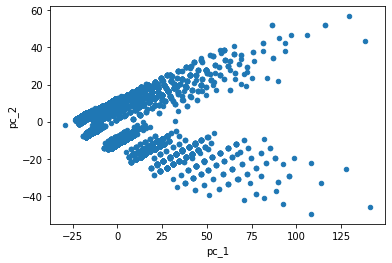

In [19]:
pca_df.plot.scatter(x='pc_1', y='pc_2');

# U-MAP

In [22]:
#!pip install umap

In [25]:
# pip install umap-learn

In [26]:
#!pip install scikit-learn numba

# Clusters

In [27]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(n_clusters=2).fit(pca_df)